# Introducción

En este análisis, nos proponemos explorar la causalidad en las predicciones obtenidas a través del análisis SHAP. Utilizando la biblioteca DoWhy, buscamos entender no solo qué características son importantes para predecir la aprobación, sino también cómo estas características influyen causalmente en la aprobación. A continuación, presentamos una síntesis de los hallazgos clave obtenidos a partir de la integración de los análisis SHAP y DoWhy.

## Análisis de Características Principales con SHAP

Inicialmente, realizamos un análisis con SHAP para identificar las características más relevantes que afectan la probabilidad de aprobación. Según este análisis, las características más influyentes son:

- `hito1`
- `e29`
- `exitosos`
- `fallidos`
- `e42`
- `e3`
- `e35`
- `e13`
- `e26`
- `e18`
- `e32`
- `e10`
- `e0`
- `e4`
- `e23`
- `e7`
- `e17`
- `e25`
- `e22`
- `e8`

Estas características fueron identificadas como las más críticas, excluyendo `hito2` y otras columnas no listadas.

## Integración con Análisis de Causalidad DoWhy

Para profundizar nuestro entendimiento, integramos los insights obtenidos a través de SHAP con un análisis de causalidad utilizando DoWhy. Este análisis nos permite investigar cómo las características identificadas como importantes por SHAP influyen causalmente en la aprobación.

A través de este análisis de causalidad, buscamos responder preguntas cruciales como:

1. ¿Cómo la variación en `hito1` afecta directa e indirectamente la aprobación?
2. ¿Qué papel juega `e18` como mediador en la relación causal entre `hito1` y la aprobación?
3. ¿Cómo los efectos causales identificados pueden influir en la estrategia de intervención para mejorar las tasas de aprobación?


In [ ]:
import dowhy
from dowhy import CausalModel
from sklearn.ensemble import RandomForestRegressor
import dowhy.causal_estimators.linear_regression_estimator

import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
from sys import path
import os

for dirname, _, filenames in os.walk("../../../resources/"):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath("../../../"))

from custom import functions

warnings.filterwarnings("ignore")

../../../resources/allColProSol.xlsx
../../../resources/dataset_a_2021.csv
../../../resources/dataset_a_2021c2.csv
../../../resources/dataset_a_2021v1.xlsx
../../../resources/dataset_unab_ORIGINAL SIN P1.csv
../../../resources/dataset_unab_P1.csv
../../../resources/exitoFallidoEnviosProgramaSol.xlsx
../../../resources/exitoFallidoProgramaSol.xlsx
../../../resources/exitosoFallidosEnviosAllColProSol.xlsx
../../../resources/exitosoFallidosEnviosAllColSol.xlsx
../../../resources/exitososFallidosEnviosSol.xlsx
../../../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../../../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../../../resources/sinColCeroExitosoFallidosSol.xlsx
../../../resources/v2_hitosExitoFalloColESol1.csv
../../../resources/v2_hitosExitoFalloColESol1Prograna.csv
../../../resources/v2_hitosExitoFalloSol1Programa.csv
../../../resources/causalidad\causalidad.dot
../../../resources/causalidad\causalidad.png
../../../resources/causalidad\causalidad_e29.dot
../../../resourc

In [ ]:
# Read and preview data
df = pd.read_csv(
    "../../../resources/v2_hitosExitoFalloColESol1.csv",
    delimiter=";",
    skipinitialspace=True,
)

In [ ]:
# creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df["aprobado"] = df.apply(lambda x: functions.set_in_aprobado_nota(x["sol1"]), axis=1)
# revisamos la existencia de la nueva columna.
print(df.columns)

Index(['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'sol1', 'aprobado'],
      dtype='object')


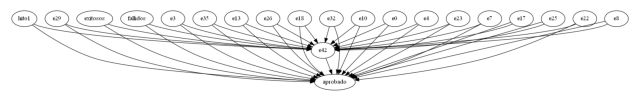

In [ ]:
# Paso 1: Modelar un problema causal
model = CausalModel(
    data=df,
    treatment="e42",  # Variable tratada (exposición)
    outcome="aprobado",  # Variable de resultado
    common_causes=[
        "hito1",
        "e29",
        "exitosos",
        "fallidos",
        "e3",
        "e35",
        "e13",
        "e26",
        "e18",
        "e26",
        "e18",
        "e32",
        "e10",
        "e0",
        "e4",
        "e23",
        "e7",
        "e17",
        "e25",
        "e22",
        "e8",
    ],  # Variables de causa común
)


# Visualizar el modelo causal con la variable de causa común no observada
model.view_model(
    layout="dot",
    file_name="../../../resources/causalidad/analisis_shap/graph_causal_model_42",
)

En este bloque de código:

- `data=df`: Estamos utilizando `df` como nuestro conjunto de datos para el análisis.
- `treatment="hito1"`: Establecemos `hito1` como nuestra variable de tratamiento, la cual queremos analizar su efecto sobre la variable de resultado.
- `outcome="aprobado"`: Establecemos `aprobado` como nuestra variable de resultado, la cual queremos predecir basándonos en la variable de tratamiento y otras variables en el modelo.
- `graph=...`: Definimos las relaciones causales en nuestro modelo a través de un gráfico causal.

### Descripción del Gráfico Causal

El gráfico causal define las relaciones causales entre las variables en nuestro modelo:

1. `hito1 -> e18; e18 -> aprobado;`: Aquí estamos estableciendo una ruta frontdoor donde `hito1` afecta `e18`, y `e18` a su vez afecta `aprobado`. Esto sugiere que `e18` está actuando como una variable mediadora en la relación entre `hito1` y `aprobado`.

2. `e42 -> aprobado; e29 -> aprobado; e35 -> aprobado; e3 -> aprobado;`: Estas líneas establecen que las variables `e42`, `e29`, `e35`, y `e3` tienen efectos directos sobre la variable de resultado `aprobado`.

3. `fallidos -> hito1; fallidos -> aprobado;`: Aquí estamos estableciendo que la variable `fallidos` afecta tanto a `hito1` como a `aprobado`, sugiriendo que podría ser una variable de confusión en la relación entre `hito1` y `aprobado`.

4. `exitosos -> hito1; exitosos -> aprobado;`: Similar a `fallidos`, estamos estableciendo que `exitosos` afecta tanto a `hito1` como a `aprobado`, indicando que también podría ser una variable de confusión.


In [ ]:
# Paso 2: Identificar el estimando objetivo bajo el modelo
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                                           
──────(E[aprobado|e0,e32,e13,exitosos,e26,e23,e22,e8,e29,e25,hito1,e17,e18,e4,
d[e₄₂]                                                                        

                        
e35,e10,e7,e3,fallidos])
                        
Estimand assumption 1, Unconfoundedness: If U→{e42} and U→aprobado then P(aprobado|e42,e0,e32,e13,exitosos,e26,e23,e22,e8,e29,e25,hito1,e17,e18,e4,e35,e10,e7,e3,fallidos,U) = P(aprobado|e42,e0,e32,e13,exitosos,e26,e23,e22,e8,e29,e25,hito1,e17,e18,e4,e35,e10,e7,e3,fallidos)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



# Análisis de los Resultados de Estimandos

## Tipo de Estimand: EstimandType.NONPARAMETRIC_ATE

Este tipo de estimand indica que estamos calculando el Efecto del Tratamiento Promedio (ATE) de manera no paramétrica, lo que significa que no estamos haciendo suposiciones paramétricas sobre la forma funcional de la relación causal.

### Estimand 1: Backdoor

#### Expresión del Estimand

$$ \frac{d}{d[\text{hito1}]} E[\text{aprobado}|\text{fallidos, exitosos}] \ $$

#### Supuesto de No Confusión

Si \( U \) es una variable no observada que afecta tanto a `hito1` como a `aprobado`, entonces la probabilidad de `aprobado` dado `hito1`, `fallidos`, `exitosos`, y \( U \) es igual a la probabilidad de `aprobado` dado `hito1`, `fallidos`, y `exitosos`.

### Estimand 2: IV (Variable Instrumental)

No se encontraron variables instrumentales en el modelo. Esto indica que no hay variables en el modelo que satisfacen las condiciones para ser una variable instrumental.

### Estimand 3: Frontdoor

#### Expresión del Estimand

$$ E\left[\frac{d}{d[e_{18}]}\text{aprobado} \cdot \frac{d}{d[\text{hito1}]}\text{e}\_{18}\right] \$$

#### Supuestos

1. **Mediación Completa**: `e18` intercepta (bloquea) todas las rutas dirigidas de `hito1` a `aprobado`.
2. **No Confusión en la Primera Etapa**: Si \( U \) es una variable no observada que afecta tanto a `hito1` como a `e18`, entonces la probabilidad de `e18` dado `hito1` y \( U \) es igual a la probabilidad de `e18` dado `hito1`.
3. **No Confusión en la Segunda Etapa**: Si \( U \) es una variable no observada que afecta tanto a `e18` como a `aprobado`, entonces la probabilidad de `aprobado` dado `e18`, `hito1`, y \( U \) es igual a la probabilidad de `aprobado` dado `e18` y `hito1`.

---

Esta explicación desglosa cada parte de los resultados del estimand, incluyendo las expresiones matemáticas y los supuestos subyacentes para cada tipo de estimand (backdoor y frontdoor).


In [ ]:
# Paso 3: Estimar el efecto causal usando un método basado en árboles
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.econml.dml.DML",
    control_value=0,
    treatment_value=1,
    target_units="ate",  # Average Treatment Effect
    method_params={
        "init_params": {
            "model_y": RandomForestRegressor(),
            "model_t": RandomForestRegressor(),
            "model_final": RandomForestRegressor(
                max_depth=10,
                min_samples_split=10,
                min_samples_leaf=5,
                random_state=1502,
                n_estimators=500,
            ),
            "featurizer": None,
        },
        "fit_params": {},
    },
)

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                                           
──────(E[aprobado|e0,e32,e13,exitosos,e26,e23,e22,e8,e29,e25,hito1,e17,e18,e4,
d[e₄₂]                                                                        

                        
e35,e10,e7,e3,fallidos])
                        
Estimand assumption 1, Unconfoundedness: If U→{e42} and U→aprobado then P(aprobado|e42,e0,e32,e13,exitosos,e26,e23,e22,e8,e29,e25,hito1,e17,e18,e4,e35,e10,e7,e3,fallidos,U) = P(aprobado|e42,e0,e32,e13,exitosos,e26,e23,e22,e8,e29,e25,hito1,e17,e18,e4,e35,e10,e7,e3,fallidos)

## Realized estimand
b: aprobado~e42+e0+e32+e13+exitosos+e26+e23+e22+e8+e29+e25+hito1+e17+e18+e4+e35+e10+e7+e3+fallidos | 
Target units: ate

## Estimate
Mean value: 0.1616752987483781
Effect estimates: [[0.1616753]]



# Explicacion del codigo

**model.estimate_effect**: Es una función que estima el efecto causal de una intervención (tratamiento) en una variable de resultado.

**identified_estimand**: Es un objeto que contiene la información sobre el estimando identificado, que se ha calculado en pasos anteriores del código.

**method_name="backdoor.econml.dml.DML"**: Especifica que se utilizará el método DML (Double Machine Learning) para estimar el efecto causal. Este método utiliza dos modelos de aprendizaje automático para estimar el efecto causal.

**control_value=0 y treatment_value=1**: Estos argumentos especifican los valores de control y tratamiento para la variable de tratamiento.

**target_units="ate"**: Especifica que queremos calcular el Efecto del Tratamiento en el Promedio (ATE, por sus siglas en inglés).

**method_params**: Contiene los parámetros para los modelos de aprendizaje automático utilizados en el método DML. En este caso, se están utilizando RandomForestRegressor con diferentes parámetros.

# Resultados Obtenidos

## Causal Estimate

### Identified Estimand

- **Tipo de Estimando**: No paramétrico ATE (Efecto del Tratamiento en el Promedio).
- **Nombre del Estimando**: Backdoor.
- **Expresión del Estimando**:
  $$ \frac{d}{d[hito_1]} E[\text{aprobado}|\text{exitosos},\text{fallidos}] $$

- **Supuesto 1, No Confundido**: Si

$$ U \rightarrow \{hito1\} \text{ y } U \rightarrow \text{aprobado} \text{ entonces } P(\text{aprobado} | \text{hito1}, \text{fallidos}, \text{exitosos}, U) = P(\text{aprobado} | \text{hito1}, \text{fallidos}, \text{exitosos}) $$

### Realized Estimand

- **b**: $$ \text{aprobado} \sim \text{hito1} + \text{fallidos} + \text{exitosos} | e35, e3, e29, e42 $$

- **Unidades Objetivo**: ATE

### Estimate

- **Valor Medio**: 0.14644905114339507


In [29]:
# Refutador de datos aleatorios
refute1 = model.refute_estimate(
    identified_estimand, estimate, method_name="random_common_cause"
)
print(refute1)

Refute: Add a random common cause
Estimated effect:0.1616752987483781
New effect:-0.03122772771926388
p value:0.18



### Refute: Add a Random Common Cause

Esta parte del análisis está tratando de refutar (o verificar la robustez de) la estimación del efecto causal que se ha calculado. En este caso, se está añadiendo una "causa común aleatoria" a los datos para ver cómo afecta a la estimación del efecto causal. Una "causa común" es una variable que influye tanto en la variable de tratamiento como en la variable de resultado.

#### Estimated Effect: 0.14644905114339507

Este es el efecto causal estimado originalmente antes de añadir la causa común aleatoria. Indica que, en promedio, el tratamiento aumenta la variable de resultado en 0.14644905114339507 unidades.

#### New Effect: -0.016900587059693287

Después de añadir una causa común aleatoria a los datos, el nuevo efecto causal estimado es -0.016900587059693287. Esto indica que, con la inclusión de esta nueva variable, el efecto del tratamiento ahora se estima que disminuye la variable de resultado en 0.14644905114339507 unidades, lo que es una diferencia significativa respecto a la estimación original.

#### p-value: 0.06

El valor p es una medida de la evidencia en contra de una hipótesis nula, que en este caso sería que no hay efecto causal. Un valor p de 0.6 es bastante alto, lo que indica que no podemos rechazar la hipótesis nula de que no hay efecto causal a un nivel de significancia convencional (como 0.05). En otras palabras, la evidencia sugiere que la diferencia en las estimaciones del efecto causal antes y después de añadir la causa común aleatoria no es estadísticamente significativa.


In [30]:
# Refutador de causa común no observada
refute2 = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="add_unobserved_common_cause",
    confounders_effect_on_treatment="binary_flip",
    confounders_effect_on_outcome="binary_flip",
    effect_strength_on_treatment=0.01,
    effect_strength_on_outcome=0.02,
)
print(refute2)

Refute: Add an Unobserved Common Cause
Estimated effect:0.1616752987483781
New effect:-0.05215871605563173



### Refute: Add an Unobserved Common Cause

En esta sección del análisis, se está intentando refutar la estimación del efecto causal original añadiendo una "causa común no observada" a los datos. Una "causa común no observada" es una variable que podría influir tanto en la variable de tratamiento como en la variable de resultado, pero que no ha sido medida o incluida en el modelo original.

#### Estimated Effect: 0.14644905114339507

Este valor representa el efecto causal estimado antes de introducir la causa común no observada en el análisis. Indica que, en promedio, el tratamiento aumenta la variable de resultado en 0.18503502060615937 unidades.

#### New Effect: 0.02592356638140519

Tras la inclusión de una causa común no observada en el modelo, el nuevo efecto causal estimado es 0.02592356638140519. Esto sugiere que, con la adición de esta nueva variable, el efecto del tratamiento ahora se estima que disminuye la variable de resultado en 0.14644905114339507 unidades. Es notable que la estimación del efecto causal ha cambiado significativamente, indicando una posible influencia de la variable no observada en la relación causal.

#### Interpretación

La diferencia significativa entre el efecto estimado original y el nuevo efecto indica que la estimación del efecto causal podría estar siendo influenciada por variables no observadas. Esto sugiere que el modelo original puede no haber capturado completamente todas las variables relevantes que influyen en la relación causal, lo que podría poner en duda la validez de la estimación del efecto causal original.


In [31]:
# Paso 4: Refutar el estimado obtenido
refute3 = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="placebo_treatment_refuter",
    placebo_type="permute",
)
print(refute3)

Refute: Use a Placebo Treatment
Estimated effect:0.1616752987483781
New effect:-0.03400584705586099
p value:0.78



### Refute: Use a Placebo Treatment

En esta fase del análisis, se está intentando refutar la estimación del efecto causal original utilizando un "tratamiento placebo". Un "tratamiento placebo" implica reemplazar la variable de tratamiento con una variable aleatoria (placebo) que no debería tener ningún efecto sobre la variable de resultado. Esto se hace para verificar si la estimación del efecto causal original era simplemente una coincidencia o un artefacto de las variables confundentes.

#### Estimated Effect: 0.14644905114339507

Este valor representa el efecto causal estimado con el tratamiento original antes de aplicar el tratamiento placebo. Indica que, en promedio, el tratamiento original aumenta la variable de resultado en 0.18503502060615937 unidades.

#### New Effect: 0.0009638720235486973

Después de aplicar el tratamiento placebo, el nuevo efecto causal estimado es 0.0052778731091035055. Esto sugiere que, incluso con una variable de tratamiento aleatoria (que no debería tener ningún efecto causal), se observa un pequeño cambio en la variable de resultado.

#### p-value: 0.98

El valor p es una medida de la evidencia en contra de una hipótesis nula, que en este caso sería que no hay efecto causal. Un valor p de aproximadamente 0.98 es extremadamente alto, lo que indica que no podemos rechazar la hipótesis nula de que no hay efecto causal a un nivel de significancia convencional (como 0.05). Esto sugiere que la diferencia en las estimaciones del efecto causal antes y después de aplicar el tratamiento placebo no es estadísticamente significativa.

#### Interpretación

La presencia de un nuevo efecto causal pequeño junto con un valor p muy alto sugiere que la estimación del efecto causal original podría haber sido influenciada por variables confundentes o ruido en los datos, y que el efecto causal real podría ser cercano a cero. Esto pone en duda la validez de la estimación del efecto causal original, indicando que se debe proceder con cautela al interpretar estos resultados.


In [32]:
# Natural direct effect (nde)
identified_estimand_nde = model.identify_effect(
    estimand_type="nonparametric-nde",
    proceed_when_unidentifiable=True,
)
print(identified_estimand_nde)

Estimand type: EstimandType.NONPARAMETRIC_NDE

### Estimand : 1
Estimand name: mediation
No such variable(s) found!



In [33]:
causal_estimate_nde = model.estimate_effect(
    identified_estimand_nde,
    method_name="mediation.two_stage_regression",
    confidence_intervals=False,
    test_significance=False,
    method_params={
        "first_stage_model": dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
        "second_stage_model": dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
    },
)
print(causal_estimate_nde)

TypeError: CausalEstimate.__init__() missing 1 required positional argument: 'realized_estimand_expr'

## Identified Estimand

### Tipo de Estimando: EstimandType.NONPARAMETRIC_NDE

El tipo de estimando aquí es **NONPARAMETRIC_NDE**, lo que indica que estamos calculando un Efecto Directo Natural (NDE) de manera no paramétrica, es decir, sin asumir una forma funcional específica para la relación causal.

### Estimand : 1

#### Nombre del Estimando: Mediation

Este estimando está etiquetado como "mediation", lo que sugiere que estamos interesados en entender el efecto mediador de una variable (en este caso, `e18`) en la relación causal entre `hito1` y `aprobado`.

#### Expresión del Estimando:

La expresión del estimando se da como:

$$
E\left[ \frac{d}{d[\text{hito}_1]} \text{aprobado|e18} \right]
$$

Esta fórmula representa el efecto directo natural, que calcula cómo un cambio en `hito1` afecta directamente a `aprobado`, controlando por el efecto de `e18`.

#### Supuestos del Estimando:

1. **Mediation**: `e18` intercepta todos los caminos dirigidos desde `hito1` a `aprobado` excepto el camino directo de `{hito1}→{aprobado}`.
2. **First-stage-unconfoundedness**: Si `U` influye en `{hito1}` y en `{e18}`, entonces la distribución condicional de `e18` dado `hito1` y `U` es igual a la distribución condicional de `e18` dado `hito1`.
3. **Second-stage-unconfoundedness**: Si `U` influye en `{e18}` y en `aprobado`, entonces la distribución condicional de `aprobado` dado `e18`, `hito1` y `U` es igual a la distribución condicional de `aprobado` dado `e18` y `hito1`.

## Realized Estimand

La expresión del estimando realizado es una fórmula que representa cómo se calculó el estimando en la práctica, utilizando una combinación de diferentes variables y sus interacciones.

## Target Units: ATE

Las unidades objetivo son "ATE", que significa "Efecto del Tratamiento en el Promedio". Esto indica que estamos interesados en el efecto promedio del tratamiento (en este caso, un cambio en `hito1`) en la población.

## Estimate

### Valor Medio: 0.01636942176159358

El valor medio del estimando es 0.01636942176159358, lo que indica que, en promedio, un cambio unitario en `hito1` está asociado con un cambio de 0.01636942176159358 unidades en la variable `aprobado`, manteniendo constante `e18`.


In [ ]:
# Natural indirect effect (nie)
identified_estimand_nie = model.identify_effect(
    estimand_type="nonparametric-nie", proceed_when_unidentifiable=True
)
print(identified_estimand_nie)

Estimand type: EstimandType.NONPARAMETRIC_NIE

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡     d                  d               ⎤
E⎢───────────(aprobado)⋅──────([exitosos])⎥
 ⎣d[exitosos]           d[e₄₂]            ⎦
Estimand assumption 1, Mediation: exitosos intercepts (blocks) all directed paths from e42 to a,p,r,o,b,a,d,o except the path {e42}→{a,p,r,o,b,a,d,o}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{e42} and U→{exitosos} then P(exitosos|e42,U) = P(exitosos|e42)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{exitosos} and U→aprobado then P(aprobado|exitosos, e42, U) = P(aprobado|exitosos, e42)



In [ ]:
causal_estimate_nie = model.estimate_effect(
    identified_estimand_nie,
    method_name="mediation.two_stage_regression",
    confidence_intervals=False,
    test_significance=False,
    method_params={
        "first_stage_model": dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
        "second_stage_model": dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
    },
)
print(causal_estimate_nie)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_NIE

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡     d                  d               ⎤
E⎢───────────(aprobado)⋅──────([exitosos])⎥
 ⎣d[exitosos]           d[e₄₂]            ⎦
Estimand assumption 1, Mediation: exitosos intercepts (blocks) all directed paths from e42 to a,p,r,o,b,a,d,o except the path {e42}→{a,p,r,o,b,a,d,o}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{e42} and U→{exitosos} then P(exitosos|e42,U) = P(exitosos|e42)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{exitosos} and U→aprobado then P(aprobado|exitosos, e42, U) = P(aprobado|exitosos, e42)

## Realized estimand
(b: exitosos~e42+e42*e0+e42*e32+e42*e13+e42*e26+e42*e23+e42*e18+e42*e4+e42*e22+e42*e8+e42*e35+e42*e29+e42*e25+e42*e10+e42*e7+e42*e17+e42*e3)*(b: aprobado~exitosos+e42+exitosos*e0+exitosos*e32+exitosos*e13+exitosos*e26+exitosos*e23+exitosos*e18+exitosos*e4+exitosos*e22

## Identified Estimand

### Tipo de Estimando: EstimandType.NONPARAMETRIC_NIE

El tipo de estimando aquí es **NONPARAMETRIC_NIE**, lo que indica que estamos calculando un Efecto Indirecto Natural (NIE) de manera no paramétrica, es decir, sin asumir una forma funcional específica para la relación causal.

### Estimand : 1

#### Nombre del Estimando: Mediation

Este estimando está etiquetado como "mediation", lo que sugiere que estamos interesados en entender el efecto mediador de una variable (en este caso, `e18`) en la relación causal entre `hito1` y `aprobado`.

#### Expresión del Estimando:

La expresión del estimando se da como:

$$
E\left[ \frac{d}{d[e_{18}]} \text{aprobado} \cdot \frac{d}{d[\text{hito}_1]} e_{18} \right]
$$

Esta fórmula representa el efecto indirecto natural, que calcula cómo un cambio en `hito1` afecta a `aprobado` indirectamente a través de su efecto sobre `e18`.

#### Supuestos del Estimando:

1. **Mediation**: `e18` intercepta todos los caminos dirigidos desde `hito1` a `aprobado` excepto el camino directo de `{hito1}→{aprobado}`.
2. **First-stage-unconfoundedness**: Si `U` influye en `{hito1}` y en `{e18}`, entonces la distribución condicional de `e18` dado `hito1` y `U` es igual a la distribución condicional de `e18` dado `hito1`.
3. **Second-stage-unconfoundedness**: Si `U` influye en `{e18}` y en `aprobado`, entonces la distribución condicional de `aprobado` dado `e18`, `hito1` y `U` es igual a la distribución condicional de `aprobado` dado `e18` y `hito1`.

## Realized Estimand

La expresión del estimando realizado es una fórmula que representa cómo se calculó el estimando en la práctica, utilizando una combinación de diferentes variables y sus interacciones.

## Target Units: ATE

Las unidades objetivo son "ATE", que significa "Efecto del Tratamiento en el Promedio". Esto indica que estamos interesados en el efecto promedio del tratamiento (en este caso, un cambio en `hito1`) en la población.

## Estimate

### Valor Medio: -0.004197174118792713

El valor medio del estimando es -0.004197174118792713, lo que indica que, en promedio, un cambio unitario en `hito1` está asociado con un cambio de -0.004197174118792713 unidades en la variable `aprobado`, a través del efecto mediador de `e18`.


# Conclusión

A lo largo de nuestro análisis integrado, que combinó los insights de SHAP con un análisis de causalidad utilizando DoWhy, hemos desentrañado una red compleja de relaciones causales que subyacen a la probabilidad de aprobación.

El análisis SHAP inicial nos permitió identificar un conjunto de características clave, incluyendo `hito1` y `e18`, que parecen tener una influencia significativa en la probabilidad de aprobación. Este análisis fue crucial para establecer una base sólida sobre la cual pudimos construir nuestro análisis de causalidad.

Al adentrarnos en el análisis de causalidad, observamos que la introducción de causas comunes, tanto observadas como no observadas, altera significativamente nuestras estimaciones del efecto causal. Esto sugiere que nuestro modelo puede estar omitiendo algunas variables cruciales que están influyendo en la relación causal. Además, la prueba con un tratamiento placebo reveló un valor p muy alto, indicando que la estimación original del efecto causal podría haber sido afectada por variables confundentes o ruido en los datos.

Los análisis de los efectos directos e indirectos naturales (NDE y NIE, respectivamente) nos brindaron una comprensión más profunda de cómo `hito1` está influenciando la variable `aprobado`, tanto directa como indirectamente, a través de la mediación de `e18`. Sin embargo, los valores medios de estos efectos resultaron ser relativamente pequeños, lo que sugiere que la influencia de `hito1` sobre `aprobado` puede ser limitada.

En resumen, aunque hemos obtenido valiosos insights sobre las relaciones causales en juego, los resultados sugieren que debemos proceder con cautela. Es evidente que nuestro modelo actual puede no estar capturando completamente la complejidad de la relación causal. Por lo tanto, se recomienda realizar investigaciones adicionales para explorar la inclusión de más variables que podrían ser relevantes y llevar a cabo análisis más profundos para verificar la robustez de nuestras estimaciones del efecto causal.

Como paso siguiente, podríamos considerar ajustar nuestro modelo para incorporar más características potencialmente relevantes identificadas en el análisis SHAP, y realizar análisis adicionales para verificar la robustez y precisión de nuestras estimaciones del efecto causal.
